1                 NaT
8     0 days 00:37:00
15    0 days 00:03:00
22    0 days 00:03:00
29    0 days 00:09:00
36    0 days 00:01:00
43    0 days 00:00:00
50    0 days 00:01:00
57    0 days 00:01:00
64    0 days 00:01:00
71    0 days 00:03:00
78    0 days 00:03:00
85    0 days 00:02:00
92    0 days 00:01:00
99    0 days 00:01:00
106   0 days 00:05:00
113   0 days 00:00:00
120   0 days 00:02:00
127   0 days 00:00:00
134   0 days 00:01:00
141   0 days 00:01:00
148   0 days 00:01:00
155   0 days 00:01:00
162   0 days 00:02:00
169   0 days 00:02:00
176   0 days 00:01:00
183   0 days 00:18:00
190   0 days 00:00:00
197   0 days 00:03:00
204   0 days 00:04:00
211   0 days 00:05:00
218   0 days 00:05:00
225   0 days 00:02:00
232   0 days 00:55:00
239   0 days 00:09:00
246   0 days 00:05:00
253   0 days 00:14:00
260   0 days 00:02:00
267   0 days 00:08:00
274   0 days 00:03:00
281   0 days 00:02:00
288   0 days 00:01:00
295   0 days 00:02:00
302   0 days 00:03:00
309   0 days 00:01:00
316   0 da

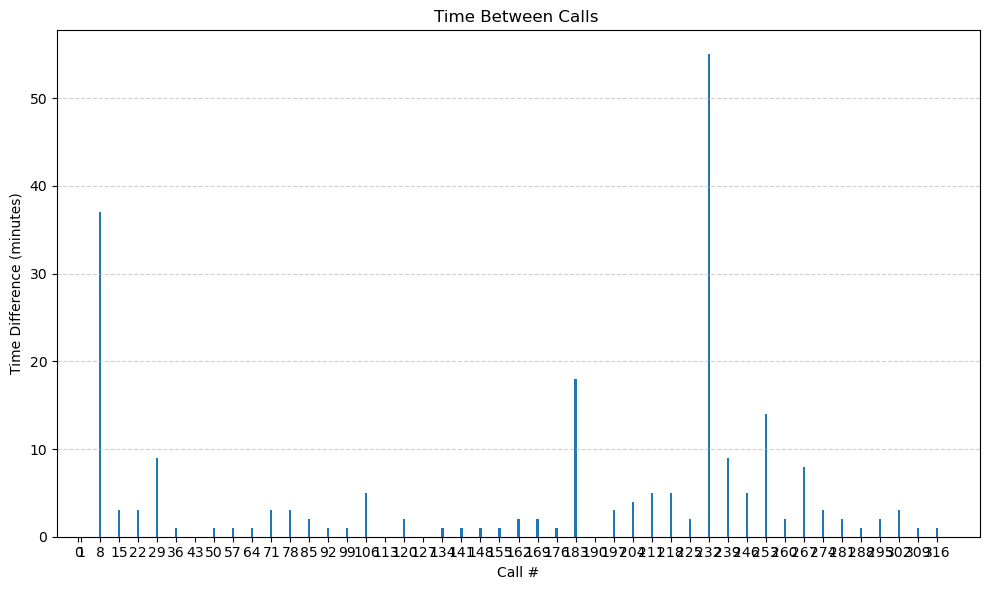

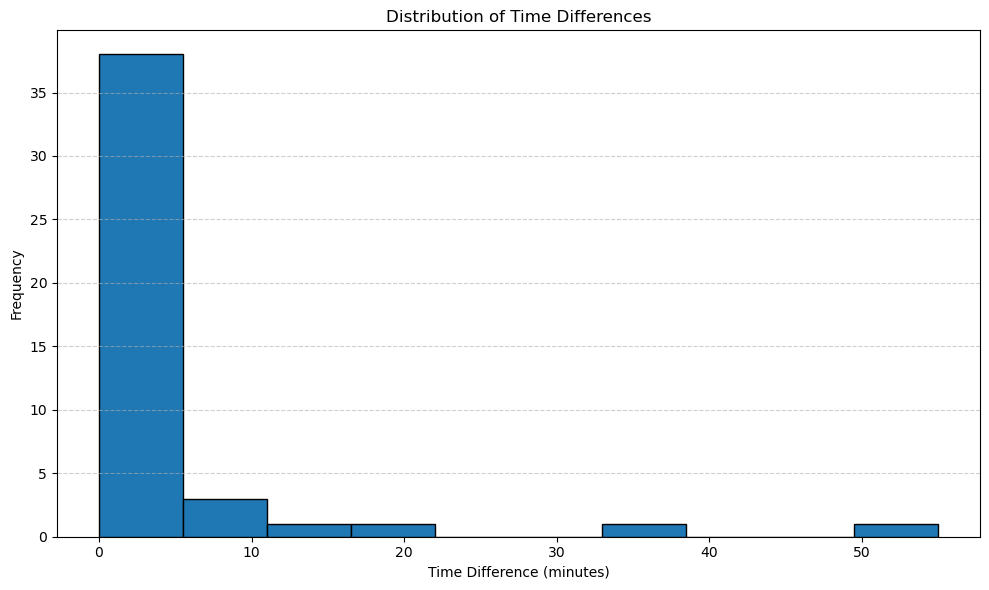

In [2]:
#Used to parse VS CRM call log and check for slacking!

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

df = pd.read_excel('/Users/robertwrobel/Downloads/kg.xlsx')
df = df.iloc[1::7]  
df['Updated'] = df['Updated'] + "m"

def convert_to_datetime(time_str):
  return datetime.strptime(time_str, "%I:%M%p")

df['Time'] = df['Updated'].apply(convert_to_datetime)

df['Delay'] = df['Time'].diff()
df.loc[0, 'Delay'] = pd.NaT  
print(df['Delay'])

df['Delay2'] = df['Delay'].dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Delay2'])
plt.xlabel('Call #')
plt.ylabel('Time Difference (minutes)')
plt.title('Time Between Calls ')
plt.xticks(df.index)  
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.figure(figsize=(10, 6))
plt.hist(df['Delay2'], bins=10, edgecolor='black')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Differences')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()